<a href="https://colab.research.google.com/github/nadireus/AUTOSCOUT-P/blob/main/Autoscout_part1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some important features to note include”

Manipulation: moving columns, slicing, reshaping, merging, joining, filtering, and others.
Time-series Handling: operations on date/times, resampling, moving windows and auto-alignment of datasets.
Missing Data Handling: auto-exclude, drop, replace, interpolate missing values
Group-by Operations: SQL like group by.
Hierarchical Indexing: data structure level, powerful for efficiently organizing data by columns.
Summary Statistics: Fast and powerful summary statistics of data.
Visualization: Simplified access to plots on data structures, such as histograms, box plots, general plots and a scatter matrix.

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import stat as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
import json

In [ ]:
import dummy_threading

#reading jason file from drive

In [ ]:
df=pd.read_json("/content/drive/MyDrive/scout_car.json", lines=True) #reading jason  file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv(index=False) #converting jason datas to csv

In [ ]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [ ]:
df= df.rename(columns={"\nComfort & Convenience\n" : "Comfort_and_Convenience", 
                       "\nEntertainment & Media\n" : "Entertainment_and_Media",
                       "\nExtras\n" : 'Extras', 
                       "\nSafety & Security\n" : 'Safety_and_Security'})  #Rename the columns

In [ ]:
df.tail()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,147 kW,"[, New, , Diesel (Particulate Filter)]",NaN,NaN,NaN,\n24 months\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n10988301\n],NaN,"[\n, Grey, \n]",[\nMetallic\n],[\nGrigio scuro\n],NaN,"[\n, Van, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\nVettura visionabile nella sede in Via Roma ...,NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,"9,900 km",01/2019,1 previous owner,NaN,165 kW,"[, Used, , Super 95 / Super Plus 98 (Particula...","[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...","[\n01/2022\n, \n168 g CO2/km (comb)\n]",NaN,"[\n, \n, \nEuro 6\n]",NaN,"[\n, \n, \n4 (Green)\n]",[],\nRenault\n,"[\n, Espace, \n]",[\n507370_3223\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nStahl-Grau Metallic\n],[\nCloth\n],"[\n, Van, \n]",[\n5\n],[\n5\n],[\n0000/000\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,708 kg\n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...",[\n168 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Adaptive Cruise Control, Blind spot moni...","[\nDach: Panorama-Glas-Schiebedach, Lackierung...",NaN,[\n7\n],[\nGermany\n],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15 km,03/2019,1 previous owner,NaN,146 kW,"[, Pre-registered, , Diesel]","[\n1\n, \n139 g CO2/km (comb)\n]",NaN,"[\nYes\n, \nEuro 6d-TEMP\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nRenault\n,"[\n, Espace, \n]",[\nEspace16\n],"[\n, 2019, \n]","[\n, White, \n]",NaN,[\narktis-weiß\n],"[\nFull leather, Black\n]","[\n, Van, \n]",[\n5\n],[\n7\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Blind spot moni...","[\n, Getriebe:, Automatik, Technik:, Bordcom...",NaN,[\n6\n],[\nAustria\n],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10 km,06/2019,None,NaN,147 kW,"[, Pre-registered, , Diesel]",NaN,NaN,NaN,\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n2691331\n],"[\n, 2019, \n]","[\n, Grey, \n]",NaN,[\nGrigio\n],[\nPart leather\n],"[\n, Van, \n]",[\n5\n

In [ ]:
df.shape

(15919, 54)

In [ ]:
df.dtypes

In [ ]:
df.describe()

,price,kW,num_missing
count,15919.000000,0.0,15919.000000
mean,18019.896727,NaN,16.459765
std,7386.169409,NaN,4.598163
min,13.000000,NaN,7.000000
25%,12850.000000,NaN,13.000000
50%,16900.000000,NaN,16.000000
75%,21900.000000,NaN,19.000000
max,74600.000000,NaN,34.000000


In [ ]:
df.describe(include= 'O')

,url,make_model,short_description,body_type,vat,km,registration,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
count,15919,15919,15873,15859,11406,15919,15919,9091,15919,15917,9279,3535,3932,10499,8215,7177,15919,15919,15919,12744,14322,15322,10147,12160,12199,15859,15707,14942,4978,15919,15423,10239,8945,9061,15919,14013,14111,12898,14999,14545,12957,14937,15919,3985,11207,7586,137,566,880,635,16,272
unique,15919,9,10001,9,2,6690,48,4,81,169,102,1399,202,515,122,94,1,3,9,11440,4,14,3,1927,46,9,6,6,232,3,77,7,434,3,77,881,123,7,6198,346,659,4443,12874,6,10,23,1,266,1,15,15,46
top,https://www.autoscout24.com//offers/opel-corsa...,Audi A3,SPB 1.6 TDI 116 CV S tronic Sport,Sedans,VAT deductible,10 km,-/-,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,\n04/2022\n,"[\nYes\n, \nEuro 6\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],\nOpel\n,"[\n, A3, \n]",[\nTA76392\n],"[\n, 2018, \n]","[\n, Black, \n]",[\nMetallic\n],[\nOnyx Schwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0035/BCB\n],"[\n, Manual, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,163 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.9 l/100 km (comb)], [4.1 l/100 km (city)],...",[\n120 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Electrical side mirrors, Hi...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Central door lock, Daytime running light...",[],[\n4 (Green)\n],[\n6\n],[\nGermany\n],[\n0 kWh/100 km (comb)\n],"[\n02/2019\n, \nEuro 6\n]","[[], [], []]",\nin 90 days from ordering\n,[\n04/2016\n],\n31/08/19\n
freq,1,3097,64,7903,10980,1045,1597,8294,2542,3475,8101,62,523,1868,2235,3647,15919,7343,3097,27,4522,3745,9794,338,5821,7903,11575,13336,268,8153,4761,8105,574,8886,4315,304,740,10139,216,1282,3245,538,636,3553,5822,4502,137,23,880,196,2,98


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['price' 'kW']


In [ ]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['url' 'make_model' 'short_description' 'body_type' 'vat' 'km'
 'registration' 'prev_owner' 'hp' 'Type' 'Previous Owners'
 'Next Inspection' 'Inspection new' 'Warranty' 'Full Service'
 'Non-smoking Vehicle' 'null' 'Make' 'Model' 'Offer Number'
 'First Registration' 'Body Color' 'Paint Type' 'Body Color Original'
 'Upholstery' 'Body' 'Nr. of Doors' 'Nr. of Seats' 'Model Code'
 'Gearing Type' 'Displacement' 'Cylinders' 'Weight' 'Drive chain' 'Fuel'
 'Consumption' 'CO2 Emission' 'Emission Class' '\nComfort & Convenience\n'
 '\nEntertainment & Media\n' '\nExtras\n' '\nSafety & Security\n'
 'description' 'Emission Label' 'Gears' 'Country version'
 'Electricity consumption' 'Last Service Date' 'Other Fuel Types'
 'Availability' 'Last Timing Belt Service Date' 'Available from']


#**#The chart below demonstrates the missing data patterns of the first 30 features.**

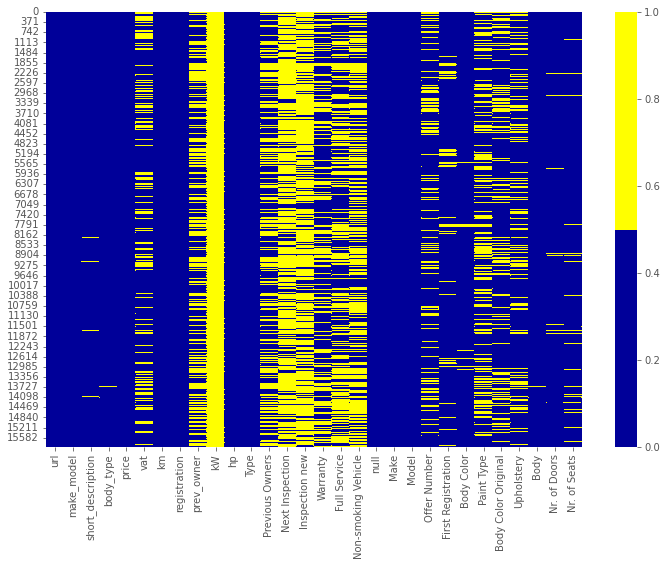

In [ ]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

##Missing Data Percentage List

In [ ]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
make_model - 0%
short_description - 0%
body_type - 0%
price - 0%
vat - 28%
km - 0%
registration - 0%
prev_owner - 43%
kW - 100%
hp - 0%
Type - 0%
Previous Owners - 42%
Next Inspection - 78%
Inspection new - 75%
Warranty - 34%
Full Service - 48%
Non-smoking Vehicle - 55%
null - 0%
Make - 0%
Model - 0%
Offer Number - 20%
First Registration - 10%
Body Color - 4%
Paint Type - 36%
Body Color Original - 24%
Upholstery - 23%
Body - 0%
Nr. of Doors - 1%
Nr. of Seats - 6%
Model Code - 69%
Gearing Type - 0%
Displacement - 3%
Cylinders - 36%
Weight - 44%
Drive chain - 43%
Fuel - 0%
Consumption - 12%
CO2 Emission - 11%
Emission Class - 19%

Comfort & Convenience
 - 6%

Entertainment & Media
 - 9%

Extras
 - 19%

Safety & Security
 - 6%
description - 0%
Emission Label - 75%
Gears - 30%
Country version - 52%
Electricity consumption - 99%
Last Service Date - 96%
Other Fuel Types - 94%
Availability - 96%
Last Timing Belt Service Date - 100%
Available from - 98%


##Missing Data Histogram

created missing indicator for: short_description
created missing indicator for: body_type
created missing indicator for: vat
created missing indicator for: prev_owner
created missing indicator for: kW
created missing indicator for: Type
created missing indicator for: Previous Owners
created missing indicator for: Next Inspection
created missing indicator for: Inspection new
created missing indicator for: Warranty
created missing indicator for: Full Service
created missing indicator for: Non-smoking Vehicle
created missing indicator for: Offer Number
created missing indicator for: First Registration
created missing indicator for: Body Color
created missing indicator for: Paint Type
created missing indicator for: Body Color Original
created missing indicator for: Upholstery
created missing indicator for: Body
created missing indicator for: Nr. of Doors
created missing indicator for: Nr. of Seats
created missing indicator for: Model Code
created missing indicator for: Displacement
created

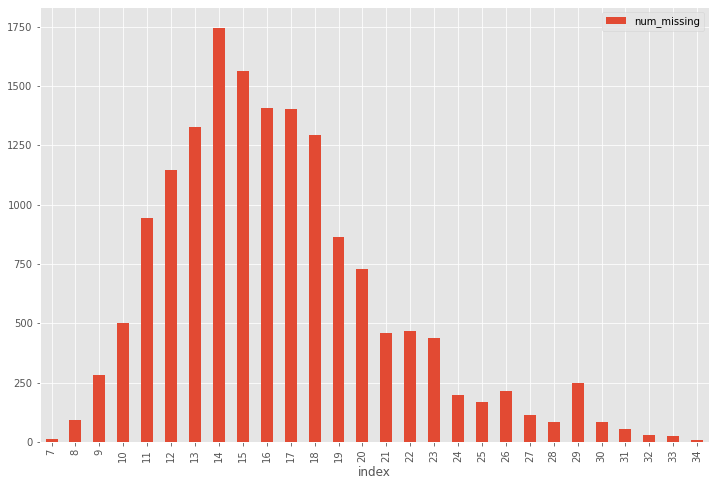

In [ ]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

plt.show()

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
#for char in spec_chars:
    #df['title'] = df['title'].str.replace(char, ' ')

#***1-url***

In [ ]:
df.drop(['url'], axis=1, inplace=True)# url has no affect on price so we can directly drop it

#***2-make_model***

In [ ]:
df['make_model'].str.get_dummies()

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,1
15915,0,0,0,0,0,0,0,0,1
15916,0,0,0,0,0,0,0,0,1
15917,0,0,0,0,0,0,0,0,1


In [ ]:
df['make_model'].astype(str)

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object

#***4-body_type***

In [ ]:
df['body_type'].astype(str)

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object

In [ ]:
df['body_type'].str.get_dummies()

In [ ]:
df['body_type'].isnull().sum()

60

In [ ]:
df.groupby('make_model')['body_type'].apply(np.mean)

TypeError: ignored

In [ ]:
df1=df.copy()

In [ ]:
df1['value'] = df['body_type'].fillna(df.groupby('make_model')[['body_type']].mode())

AttributeError: ignored

In [ ]:
df1['value']

In [ ]:
df2=df

#***5-Price***

In [ ]:
df['price'].isnull().sum()

0

#***6-vat*** 

In [ ]:
df['vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [ ]:
df['vat'].isnull().sum() #missing values need to be handled

4513

#***7-km***

In [ ]:
df["km"]=df["km"].str.strip('-').str.strip('km')#deleting replace ,
df["km"]

0        56,013 
1        80,000 
2        83,450 
3        73,000 
4        16,200 
          ...   
15914           
15915     9,900 
15916        15 
15917        10 
15918           
Name: km, Length: 15919, dtype: object

In [ ]:
df["km"]=df["km"].str.replace(',','', regex=True)

In [ ]:
df["km"] =pd.to_numeric(df["km"], errors='coerce').astype('Int64')
df["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914     <NA>
15915     9900
15916       15
15917       10
15918     <NA>
Name: km, Length: 15919, dtype: Int64

#***8-registration*** 

In [ ]:
df["registration"] =  df["registration"].str.strip('-/-')
df["registration"]

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914           
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [ ]:
df["registration"] =  pd.to_datetime(df["registration"]) #calculate
df["registration"]

0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration, Length: 15919, dtype: datetime64[ns]

In [ ]:
#calculating age of the autos and compare the null values with first-registration

#***9-	prev_owner***

In [ ]:
df["prev_owner"] =  df["prev_owner"].str.strip('previous owners') #compare to type in order to fillna in type
df["prev_owner"]

0           2
1        None
2           1
3           1
4           1
         ... 
15914    None
15915       1
15916       1
15917    None
15918       1
Name: prev_owner, Length: 15919, dtype: object

#***10-kW***

In [ ]:
df['kW'].isnull().sum()

In [ ]:
df.drop(['kW'], axis=1)# kW has no affect on price so we can directly drop it

#***11-hp***

In [ ]:
df["hp"]=df["hp"].str.strip('-').str.strip('kW')#deleting - 
df["hp"]

0         66 
1        141 
2         85 
3         66 
4         66 
         ... 
15914    147 
15915    165 
15916    146 
15917    147 
15918    165 
Name: hp, Length: 15919, dtype: object

In [ ]:
df["hp"] =pd.to_numeric(df["hp"], errors='coerce').astype('Int64')

In [ ]:
df["hp"].isnull().sum()#fillnan make-model

88

#***12-Type***

In [ ]:
df["Type"]=df["Type"].apply(lambda item: item[1] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Type"]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [ ]:
#fillnan get_dummies new = 1 old=1

#***13-Previous Owners***

In [ ]:
df["Previous Owners"]=df["Previous Owners"].str.strip('\n')
df["Previous Owners"]

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918      1
Name: Previous Owners, Length: 15919, dtype: object

In [ ]:
#compare fill the missing value of type then drop
#df.drop(["Previous Owners"], axis=1)# Previous Owners and Type contain same information 

#***14-Next Inspection***

In [ ]:
df["Next Inspection"]=df["Next Inspection"].apply(lambda item: item[0] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Next Inspection"]

0        \n06/2021\n
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
15914            NaN
15915    \n01/2022\n
15916            NaN
15917            NaN
15918            NaN
Name: Next Inspection, Length: 15919, dtype: object

In [ ]:
df["Next Inspection"]=df["Next Inspection"].str.strip('\n')

In [ ]:
df["Next Inspection"] =  pd.to_datetime(df["Next Inspection"])
df["Next Inspection"]

0       2021-06-01
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
15914          NaT
15915   2022-01-01
15916          NaT
15917          NaT
15918          NaT
Name: Next Inspection, Length: 15919, dtype: datetime64[ns]

In [ ]:
#compare then drop 
##df.drop(["Next Inspection"], axis=1)# Next Inspection and Inspection new  contain same information

#***15-Inspection new***

In [ ]:
df["Inspection new"]=df["Inspection new"].apply(lambda item: item[0] if type (item) == list else item)
df["Inspection new"]

0        \nYes\n
1            NaN
2            NaN
3            NaN
4        \nYes\n
          ...   
15914        NaN
15915        NaN
15916    \nYes\n
15917        NaN
15918    \nYes\n
Name: Inspection new, Length: 15919, dtype: object

In [ ]:
df["Inspection new"]=df["Inspection new"].str.strip('\n')

In [ ]:
#compare with next inspection then fill the missing values then get dummies

#***16-Warranty***

In [ ]:
df["Warranty"]=df["Warranty"].apply(lambda item: item[0] if type (item) == list else item) #cleanig the column irrelavant values,gettting the intended values
df["Warranty"]

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917               \n
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [ ]:
df["Warranty"]=df["Warranty"].str.strip('\n').str.strip('months').str.strip('inf')#.str.strip('inf')
df["Warranty"]

0           
1        NaN
2           
3        NaN
4           
        ... 
15914    24 
15915       
15916       
15917       
15918    NaN
Name: Warranty, Length: 15919, dtype: object

In [ ]:
df["Warranty"]=df["Warranty"].astype(str)
df["Warranty"]

0           
1        nan
2           
3        nan
4           
        ... 
15914    24 
15915       
15916       
15917       
15918    nan
Name: Warranty, Length: 15919, dtype: object

In [ ]:
df["Warranty"]=pd.to_numeric(df["Warranty"], errors='coerce').astype('int64')
df["Warranty"]

ValueError: ignored

#***17-Full Service***

In [ ]:
df["Full Service"]=df["Full Service"].apply(lambda item : item[0] if type(item)== list else item)
df["Full Service"]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: Full Service, Length: 15919, dtype: object

In [ ]:
df["Full Service"]=df["Full Service"].str.strip('/n').value_counts(dropna=False)
df["Full Service"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: Full Service, Length: 15919, dtype: float64

In [ ]:
df["Full Service"].isnull().sum()

15919

In [ ]:
df.drop(["Full Service"], axis=1)# There is not any information in this column

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,"[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,"[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free eq

#***18-Non-smoking Vehicle***

In [ ]:
df["Non-smoking Vehicle"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
                                                                                              ... 
[\n, \n, \n101 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 1.6 l/100 km (comb), \n, \n, \n]                                                    1
[\n, \n, \n, 5.6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.7 l/100 km (country), \n]       1
[\n, \n, \n169 g CO2/km (comb)\n]                                                                1
[\n, \n, \

In [ ]:
df["Non-smoking Vehicle"]=df["Non-smoking Vehicle"].apply(lambda item : item[0] if type(item)== list else item)

In [ ]:
df["Non-smoking Vehicle"]=df["Non-smoking Vehicle"].str.strip('\n')

In [ ]:
df["Non-smoking Vehicle"].value_counts()

    7177
Name: Non-smoking Vehicle, dtype: int64

In [ ]:
df["Non-smoking Vehicle"].unique()

array(['', nan], dtype=object)

In [ ]:
df.drop(["Non-smoking Vehicle"], axis=1)#This column does not contain useful informations

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sp

#***19-null***

In [ ]:
df["null"].value_counts()

In [ ]:
df.drop(["null"], axis=1)#This column contains only empty list

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,NaN,,\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,NaN,\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,NaN,,\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[All

#***20-Make***

In [ ]:
df.drop(["Make"], axis=1)#This column contains same informations with make-model cloumn so we dont need this column

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,NaN,,[],"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,NaN,[],"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,NaN,[],"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,NaN,,[],"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, 

#***21-Model***

In [ ]:
df.drop(["Model"], axis=1)#This column contains same informations with make-model cloumn so we dont need this column

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,NaN,,[],\nAudi\n,[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,NaN,[],\nAudi\n,NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,NaN,[],\nAudi\n,[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,NaN,,[],\nAudi\n,NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Al

#***22-Offer Number***

In [ ]:
df.drop(["Offer Number"], axis=1)#This column does not contain useful informations

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,NaN,,[],\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,nan,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]","[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,nan,NaN,,[],\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Contr

# ***23-First Registration***

In [ ]:
df["First Registration"]=df["First Registration"].apply(lambda item : item[1] if type(item)== list else item)
df["First Registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [ ]:
df["First Registration"]=  pd.to_datetime(df["First Registration"])
df["First Registration"]

0       2016-01-01
1       2017-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-01-01
15917   2019-01-01
15918   2019-01-01
Name: First Registration, Length: 15919, dtype: datetime64[ns]

In [ ]:
#we need convert this column as an age as int bei calculating age 

In [ ]:
today = pd.to_datetime("2019-01-01")
print(today)

2019-01-01 00:00:00


In [ ]:
df['diff_year'] =(today)-df["First Registration"]
df['diff_year'] 

0       1096 days
1        730 days
2       1096 days
3       1096 days
4       1096 days
           ...   
15914         NaT
15915      0 days
15916      0 days
15917      0 days
15918      0 days
Name: diff_year, Length: 15919, dtype: timedelta64[ns]

In [ ]:
df['age'] =round( df['diff_year'] / np.timedelta64(1, 'Y'),1)
df['age']

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

# ***24-Body Color***

In [ ]:
df["Body Color"]=df["Body Color"].apply(lambda item : item[1] if type(item)== list else item)
df["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [ ]:
df["Body Color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [ ]:
#after filling null values we can  apply get dummies
#df["Body Color"].str.get_dummies()

# ***25-Paint Type***

In [ ]:
df["Paint Type"]=df["Paint Type"].apply(lambda item : item[0] if type(item)== list else item)
df["Paint Type"]

0        \nMetallic\n
1                 NaN
2        \nMetallic\n
3        \nMetallic\n
4        \nMetallic\n
             ...     
15914    \nMetallic\n
15915    \nMetallic\n
15916             NaN
15917             NaN
15918    \nMetallic\n
Name: Paint Type, Length: 15919, dtype: object

In [ ]:
df["Paint Type"]=df["Paint Type"].str.strip('\n')
df["Paint Type"]

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: Paint Type, Length: 15919, dtype: object

In [ ]:
df["Paint Type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

# ***26-Body Color Original***

In [ ]:
df["Body Color Original"]=df["Body Color Original"].apply(lambda item : item[0] if type(item)== list else item)
df["Body Color Original"]

0                 \nMythosschwarz\n
1                               NaN
2        \nmythosschwarz metallic\n
3                               NaN
4        \nMythosschwarz Metallic\n
                    ...            
15914              \nGrigio scuro\n
15915       \nStahl-Grau Metallic\n
15916               \narktis-weiß\n
15917                    \nGrigio\n
15918    \nTitanium-Grau Metallic\n
Name: Body Color Original, Length: 15919, dtype: object

In [ ]:
df["Body Color Original"]=df["Body Color Original"].str.strip('\n')
df["Body Color Original"]

0                 Mythosschwarz
1                           NaN
2        mythosschwarz metallic
3                           NaN
4        Mythosschwarz Metallic
                  ...          
15914              Grigio scuro
15915       Stahl-Grau Metallic
15916               arktis-weiß
15917                    Grigio
15918    Titanium-Grau Metallic
Name: Body Color Original, Length: 15919, dtype: object

In [ ]:
df["Body Color Original"]=df["Body Color Original"].str.strip('Metallic').str.strip('metallic')
df["Body Color Original"]

0          ythosschwarz
1                   NaN
2         ythosschwarz 
3                   NaN
4         ythosschwarz 
              ...      
15914      Grigio scuro
15915       Stahl-Grau 
15916        rktis-weiß
15917            Grigio
15918    Titanium-Grau 
Name: Body Color Original, Length: 15919, dtype: object

# ***27-Upholstery-***

In [ ]:
df=pd.read_json("/content/drive/MyDrive/scout_car.json", lines=True) #reading jason file from drive

In [ ]:
df.to_csv(index=False) #converting jason datas to csv

In [ ]:
upholstery_type = ['Cloth', 'Part leather', 'Full leather', 'alcantara', 'Velour', 'Other']
upholstery_color = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White', 'Red', 'Yellow', 'Orange', 'Other']
def uphols_type(x):
    if type(x) == list:
        if x[0].strip().split(', ')[0] in upholstery_type: return x[0].strip().split(', ')[0]
        else: return None
    else:
        return None
def uphols_color(x):
    if type(x) == list:
        if x[0].strip().split(', ')[-1] in upholstery_color: return x[0].strip().split(', ')[-1]
        else: return None
    else:
        return None   
df['Upholstery_Type'] = df['Upholstery'].apply(uphols_type)
df['Upholstery_Color'] = df['Upholstery'].apply(uphols_color)

In [ ]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Upholstery_Type,Upholstery_Color
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Grey
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate

In [ ]:
pd.get_dummies(df['Upholstery_Type'], prefix='upholstery',prefix_sep='_')

,upholstery_Cloth,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
15914,0,0,0,0,0,0
15915,1,0,0,0,0,0
15916,0,1,0,0,0,0
15917,0,0,0,1,0,0


In [ ]:
pd.get_dummies(df['Upholstery_Color'],prefix='upholstery',prefix_sep='_')

,upholstery_Beige,upholstery_Black,upholstery_Blue,upholstery_Brown,upholstery_Grey,upholstery_Orange,upholstery_Other,upholstery_Red,upholstery_White,upholstery_Yellow
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,0,0
15915,0,0,0,0,0,0,0,0,0,0
15916,0,1,0,0,0,0,0,0,0,0
15917,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(2)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Upholstery_Type,Upholstery_Color
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Grey


# ***28-Body***

In [ ]:
df["Body"]=df["Body"].apply(lambda item : item[1] if type(item)== list else item)
df["Body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [ ]:
df["Body"]=df["Body"].str.strip('\n')
df["Body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [ ]:
df["Body"].isnull().sum()

60

In [ ]:
#compare with body type and drop
df.drop(["Body"], axis=1)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Upholstery_Type,Upholstery_Color
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Grey
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km

# ***29-Nr. of Doors***

In [ ]:
df["Nr. of Doors"]=df["Nr. of Doors"].apply(lambda item : item[0] if type(item)== list else item)
df["Nr. of Doors"]=df["Nr. of Doors"].str.strip('\n')
df["Nr. of Doors"]

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object

In [ ]:
df["Nr. of Doors"]=df["Nr. of Doors"].astype(float)
df["Nr. of Doors"]

0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr. of Doors, Length: 15919, dtype: float64

In [ ]:
df["Nr. of Doors"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

# ***30-Nr. of Seats***

In [ ]:
df["Nr. of Seats"]=df["Nr. of Seats"].apply(lambda item : item[0] if type(item)== list else item)
df["Nr. of Seats"]=df["Nr. of Seats"].str.strip('\n')
df["Nr. of Seats"]

0        5
1        4
2        4
3        4
4        5
        ..
15914    5
15915    5
15916    7
15917    7
15918    5
Name: Nr. of Seats, Length: 15919, dtype: object

In [ ]:
df["Nr. of Seats"]=df["Nr. of Seats"].astype('float')

In [ ]:
df["Nr. of Seats"]=pd.to_numeric(df["Nr. of Seats"], errors='coerce').astype('int64')
df["Nr. of Seats"]

ValueError: ignored

In [ ]:
df["Nr. of Seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

# ***31-Model Code***

In [ ]:
df["Model Code"]=df["Model Code"].apply(lambda item : item[0] if type(item)== list else item)
df["Model Code"]=df["Model Code"].str.strip('\n')
df["Model Code"]

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: Model Code, Length: 15919, dtype: object

In [ ]:
df["Model Code"].value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0588/AVQ        1
0035/AAA        1
0000/ACP        1
1234/123        1
0035/BGS        1
Name: Model Code, Length: 233, dtype: int64

In [ ]:
df.drop(["Model Code"],axis=1)#this column does not contain useful informations

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Upholstery_Type,Upholstery_Color
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],5.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],4.0,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Grey
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,Black
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],4.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...

# ***32-Gearing Type***

In [ ]:
df["Gearing Type"]=df["Gearing Type"].apply(lambda item : item[1] if type(item)== list else item)
df["Gearing Type"]=df["Gearing Type"].str.strip('\n')
df["Gearing Type"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object

In [ ]:
df["Gearing Type"].str.get_dummies()

,Automatic,Manual,Semi-automatic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
15914,1,0,0
15915,1,0,0
15916,1,0,0
15917,1,0,0


# ***33-Displacement***

In [ ]:
df=pd.read_json("/content/drive/MyDrive/scout_car.json", lines=True) #reading jason file from drive

In [ ]:
df.to_csv(index=False) #converting jason datas to csv

In [ ]:
df["Displacement"] = [",".join(item) if type(item) == list else item for item in df["Displacement"]] 
df["Displacement"]=df["Displacement"].str.strip('\n').str.strip(' cc')
df["Displacement"]

0        1,422
1        1,798
2        1,598
3        1,422
4        1,422
         ...  
15914    1,997
15915    1,798
15916    1,997
15917    1,997
15918    1,798
Name: Displacement, Length: 15919, dtype: object

In [ ]:
df["Displacement"]=df["Displacement"].str.replace(',','', regex=True)

In [ ]:
df["motor_cc"]=round(((df["Displacement"].astype(float))/1000),1) #converting to float
df["motor_cc"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15914    0.0
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: motor_cc, Length: 15919, dtype: float64

In [ ]:
df["Displacement"].unique()

array([ 1.4,  1.8,  1.6,  1. ,  0.9,  nan,  2. ,  1.5,  1.2,  1.9,  2.5,
        1.7, 15.9,  0.1,  1.3,  0. ,  3. , 16. ,  1.1,  0.2])

# ***34-Cylinders***

In [ ]:
df["Cylinders"]=df["Cylinders"].apply(lambda item : item[0] if type(item)== list else item)
df["Cylinders"]=df["Cylinders"].str.strip('\n')
df["Cylinders"]

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object

In [ ]:
df["Cylinders"]=df["Cylinders"].astype(float)

In [ ]:
df["Cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

# ***35-Weight***

In [ ]:
df=pd.read_json("/content/drive/MyDrive/scout_car.json", lines=True) #reading jason file from drive

In [ ]:
df.to_csv(index=False) #converting jason datas to csv

In [ ]:
df["Weight"] = [",".join(item) if type(item) == list else item for item in df["Weight"]] 
df["Weight"]=df["Weight"].str.strip('\n').str.strip(' kg')
df["Weight"]

0        1,220
1        1,255
2          NaN
3        1,195
4          NaN
         ...  
15914    1,758
15915    1,708
15916      NaN
15917    1,758
15918    1,685
Name: Weight, Length: 15919, dtype: object

In [ ]:
df["Weight"]=df["Weight"].str.replace(',','', regex=True)
df["Weight"]

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: Weight, Length: 15919, dtype: object

In [ ]:
df["Weight"]=df["Weight"].astype(float) #converting to float
df["Weight"]

0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: Weight, Length: 15919, dtype: float64

In [ ]:
df["Weight"].value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
900.0        1
1650.0       1
1428.0       1
2355.0       1
1523.0       1
Name: Weight, Length: 435, dtype: int64

# ***36-Drive chain***

In [ ]:
df["Drive chain"]=df["Drive chain"].apply(lambda item : item[0] if type(item)== list else item)
df["Drive chain"]=df["Drive chain"].str.strip('\n')
df["Drive chain"]

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

In [ ]:
pd.get_dummies(df["Drive chain"],prefix='Drivechain',prefix_sep='_')

,Drivechain_4WD,Drivechain_front,Drivechain_rear
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,1,0
...,...,...,...
15914,0,1,0
15915,0,1,0
15916,0,1,0
15917,0,1,0


# ***37-Fuel***

In [ ]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()


In [ ]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [ ]:
df["Fuel"].unique()

array(['Diesel', 'Gasoline', 'Super 95', 'Regular', 'Super E10 95',
       'Others', 'Super Plus 98', 'CNG', 'Electric', 'Biogas',
       'Domestic gas H', 'Super Plus E10 98', 'LPG',
       'Liquid petroleum gas'], dtype=object)

In [ ]:
benzine=["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg=["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
electric=["Electric"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in electric:
        return "Electric"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"]= df.Fuel.apply(fueltype)

In [ ]:
df["Fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [ ]:
pd.get_dummies(df["Fuel"],prefix='Fuel',prefix_sep='_')

,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
15914,0,1,0,0
15915,1,0,0,0
15916,0,1,0,0
15917,0,1,0,0


# ***38-Consumption***

In [ ]:
df["Consumption"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[], [], [5.6 l/100 km (country)]]                                                      1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]      1
[[3.5 l/100 km (comb)], [3.7 l/100 km (city)], [3.3 l/100 km (country)]]                1
[[3.9 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]                1
[[5.4 l/100 km (comb)], [6.1 l/100 km (city)], [5 l/100 km (country)]]                  1
Name: Cons

In [ ]:
from itertools import chain

list(chain.from_iterable(df["Consumption"]))

TypeError: ignored

In [ ]:
df2=df["Consumption"].apply(lambda item : item[0] if type(item)== list else item)
df2=df2.str.strip('\n')
df2

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915       
15916    NaN
15917    NaN
15918    NaN
Name: Consumption, Length: 15919, dtype: object

In [ ]:
df["Consumption"] = [",".join(item) if type(item) == list else item for item in df["Consumption"]] 
#

TypeError: ignored

# ***39-CO2 Emission***

In [ ]:
df["CO2 Emission"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
[\n104 g CO2/km (comb)\n]       501
                               ... 
[\n13,983 g CO2/km (comb)\n]      1
[\n331 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n14,457 g CO2/km (comb)\n]      1
[\n190 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 123, dtype: int64

In [ ]:
df["CO2 Emission"]=df["CO2 Emission"].apply(lambda item : item[0] if type(item)== list else item)
df["CO2 Emission"]=df["CO2 Emission"].str.strip('\n').str.strip('g CO2/km (comb)')
df["CO2 Emission"]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, Length: 15919, dtype: object

In [ ]:
df["CO2 Emission"].unique()

array(['99', '129', '109', '9', '98', '97', nan, '105', '11', '103', '10',
       '95', '104', '91', '94', '117', '123', '106', '108', '121', '107',
       '101', '113', '137', '100', '116', '114', '118', '331', '115',
       '119', '90', '136', '134', '110', '111', '120', '89', '14', '126',
       '1', '128', '127', '138', '130', '125', '85', '124', '15', '88',
       '189', '194', '149', '153', '188', '36', '1,060', '96', '990',
       '146', '135', '158', '12,087', '141', '17', '154', '150', '167',
       '174', '93', '133', '131', '145', '147', '156', '87', '5', '148',
       '139', '151', '144', '168', '160', '170', '80', '13', '155', '159',
       '0', '143', '140', '8', '12,324', '84', '165', '51', '157', '169',
       '166', '53', '164', '175', '190', '161', '39', '197', '184',
       '14,457', '199', '13,983', '187', '181', '186', '177', '180', '16',
       '45', '171', '183', '191', '193'], dtype=object)

In [ ]:
df[df["make_model"]=='Opel Insignia']#convert the values manual 14,457==144

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
10457,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,ST 1.6 CDTI Navi PDC Shz,Station wagon,8980,VAT deductible,"174,564 km",05/2016,1 previous owner,NaN,100 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n4 (Green)\n]",NaN,[],\nOpel\n,"[\n, Insignia, \n]",[\n226572\n],"[\n, 2016, \n]","[\n, Blue, \n]",NaN,[\nroyal blau\n],"[\nCloth, Grey\n]","[\n, Station wagon, \n]",[\n4\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,NaN,Diesel,NaN,NaN,"[[], [], []]","[Air conditioning, Automatic climate control, ...","[CD player, On-board computer]","[Roof rack, Sport seats]","[ABS, Central door lock, Daytime running light...","[\n, Nr. 1215 Standort: 27404 Bockel , , , ...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10458,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,1.6CDTI Selective Aut. 136,Sedans,11000,VAT deductible,"154,800 km",02/2016,1 previous owner,NaN,100 kW,"[, Used, , Diesel]",\n1\n,NaN,NaN,NaN,NaN,NaN,[],\nOpel\n,"[\n, Insignia, \n]",NaN,"[\n, 2016, \n]","[\n, White, \n]",NaN,NaN,NaN,"[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,513 kg\n]",NaN,Diesel,"[[4.9 l/100 km (comb)], [6.4 l/100 km (city)],...",129,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio, USB]",[Alloy wheels],"[ABS, Electronic stability control, Head airba...","[\n***Financiación 100% desde 193€/mes***, ¡Ex...",NaN,[\n6\n],[\nSpain\n],NaN,NaN,NaN,NaN,NaN,NaN
10459,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,"1.6 CDTi ECOTEC -Automaat- ,,€10.700+ 21%Btw,,",Station wagon,12950,None,"88,000 km",04/2017,1 previous owner,NaN,100 kW,"[, Used, , Diesel]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n134 g CO2/km (comb)\n]",NaN,[],\nOpel\n,"[\n, Insignia, \n]",NaN,"[\n, 2017, \n]","[\n, Grey, \n]",[\nMetallic\n],NaN,"[\nCloth, Grey\n]","[\n, Station wagon, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,613 kg\n]",NaN,Diesel,"[[5.1 l/100 km (comb)], [6.5 l/100 km (city)],...",134,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Digital radio, On-board...","[Sport package, Touch screen]","[ABS, Alarm system, Central door lock, Central...","[\n, Zeer propere wagen, zowel van binnen als ...",NaN,[\n6\n],[\nBelgium\n],NaN,NaN,NaN,NaN,NaN,NaN
10460,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,Sports Tourer 2.0 CDTI Navi AHK Abstandst,Station wagon,12480,VAT deductible,"145,945 km",04/2016,1 previous owner,NaN,125 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,"[\nYes\n, \n146 g CO2/km (comb)\n]","[\n60 months\n, \nEuro 6\n]",NaN,NaN,[],\nOpel\n,"[\n, Insignia, \n]",[\n4G1092381\n],"[\n, 2016, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nPlatin anthrazit\n],"[\nCloth, Grey\n]","[\n, Station wagon, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,956 cc\n]",NaN,NaN,NaN,Diesel,"[[5.5 l/100 km (comb)], [7.7 l/100 km (city)],...",146,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Roof rack, Sport seats, Trailer hitch]","[ABS, Adaptive Cruise Control, Adaptive headli...","[\n, Klimaautomatik, Navigation, Spurwechselas...",[\n4 (Green)\n],[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
10461,h

# ***40-Emission Class***

In [ ]:
df["Emission Class"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [ ]:
df["Emission Class"]=df["Emission Class"].apply(lambda item : item[0] if type(item)==list else item)
df["Emission Class"]=df["Emission Class"].str.strip('\n')
df["Emission Class"]=df["Emission Class"].str.replace(' ','', regex=True)

In [ ]:
df["Emission Class"].value_counts()

Euro6          10139
Euro6d-TEMP     1845
Euro6c           127
Euro5             78
Euro6d            62
Euro4             40
Name: Emission Class, dtype: int64

In [ ]:
pd.get_dummies(df["Emission Class"],prefix='FueEmissionClass',prefix_sep='_')

,FueEmissionClass_Euro4,FueEmissionClass_Euro5,FueEmissionClass_Euro6,FueEmissionClass_Euro6c,FueEmissionClass_Euro6d,FueEmissionClass_Euro6d-TEMP
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
15914,0,0,0,0,0,0
15915,0,0,0,0,0,0
15916,0,0,0,0,0,1
15917,0,0,1,0,0,0


# ***41-Comfort_and_Convenience***

In [ ]:
df["Comfort_and_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_and_Convenience"]]

In [ ]:
df["Comfort_and_Convenience"].str.get_dummies(sep=",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# ***42-Entertainment_and_Media***

In [ ]:
df["Entertainment_and_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_and_Media"]]

In [ ]:
df["Entertainment_and_Media"].str.get_dummies(sep=",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# ***43-Extras***

In [ ]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [ ]:
df["Extras"].str.get_dummies(sep=",")

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# ***44-Safety_and_Security***

In [ ]:
df["Safety_and_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_and_Security"]]

In [ ]:
df["Safety_and_Security"].str.get_dummies(sep=",")

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


# ***45-description***

In [ ]:
df["description"] = [",".join(item) if type(item) == list else item for item in df["description"]]

# ***46-Emission Label***

In [ ]:
df["Emission Label"]=df["Emission Label"].apply(lambda item : item[0] if type(item)==list else item)
df["Emission Label"]=df["Emission Label"].str.strip('\n')
df["Emission Label"]=df["Emission Label"].str.replace(' ','', regex=True)

In [ ]:
df["Emission Label"] 

0             NaN
1        4(Green)
2        4(Green)
3             NaN
4             NaN
           ...   
15914         NaN
15915         NaN
15916         NaN
15917         NaN
15918    4(Green)
Name: Emission Label, Length: 15919, dtype: object

In [ ]:
df["Emission Label"].str.get_dummies(sep=",")

,1(Nosticker),2(Red),3(Yellow),4(Green),5(Blue)
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
15914,0,0,0,0,0
15915,0,0,0,0,0
15916,0,0,0,0,0
15917,0,0,0,0,0


# ***47-Gears***

In [ ]:
df["Gears"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [ ]:
df["Gears"]=df["Gears"].apply(lambda item : item[0] if type(item)==list else item)
df["Gears"]=df["Gears"].str.strip('\n')
df["Gears"]=df["Gears"].str.replace(' ','', regex=True)

In [ ]:
df["Gears"]=df["Gears"].str.replace('50','5', regex=True)

In [ ]:
df["Gears"]=df["Gears"].astype(float)

In [ ]:
df["Gears"].value_counts()

6.0    5822
5.0    3240
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears, dtype: int64

# ***48-Country version***

In [ ]:
df["Country version"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nCroatia\n]              4
[\nSlovakia\n]             4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nSwitzerland\n]          1
[\nLuxembourg\n]           1
[\nSerbia\n]               1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [ ]:
df["Country version"]=df["Country version"].apply(lambda item : item[0] if type(item)==list else item)
df["Country version"]=df["Country version"].str.strip('\n')
df["Country version"]

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [ ]:
df["Country version"].str.get_dummies()

,Austria,Belgium,Bulgaria,Croatia,Czech Republic,Denmark,Egypt,European Union,France,Germany,Hungary,Italy,Japan,Luxembourg,Netherlands,Poland,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15915,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# ***49-Electricity consumption***

In [ ]:
df["Electricity consumption"].value_counts()

0 kWh/100 km (comb)    137
Name: Electricity consumption, dtype: int64

In [ ]:
df["Electricity consumption"]=df["Electricity consumption"].apply(lambda item : item[0] if type(item)==list else item)
df["Electricity consumption"]=df["Electricity consumption"].str.strip('\n')
df["Electricity consumption"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Electricity consumption, Length: 15919, dtype: object

In [ ]:
df.drop(["Electricity consumption"], axis=1)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_and_Convenience,Entertainment_and_Media,Extras,Safety_and_Security,description,Emission Label,Gears,Country version,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Sicherheit:, ,Deaktivierung für Beifahrer-A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Benzine,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,Euro6,"Air conditioning,Automatic climate control,Hil...","Air conditioning,Automatic climate control,Hil...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",\nLangstreckenfahrzeug daher die hohe Kilomete...,4(Green),7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,Euro6,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Cruise control,Electrical sid...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.64...",4(Green),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air suspension,Armrest,Auxiliary heating,Elect...","Air suspension,Armrest,Auxiliary heating,Elect...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","\nAudi A1: ,- 1e eigenaar ,- Perfect

# ***50-Last Service Date***

In [ ]:
df["Last Service Date"].value_counts(dropna=False)

NaN        15353
05/2019       61
02/2019       55
01/2019       51
06/2019       49
04/2019       48
03/2019       47
12/2018       32
10/2018       24
05/2018       21
07/2018       21
06/2018       21
01/2018       20
11/2018       17
09/2018       17
04/2018       16
08/2018       13
03/2018        9
06/2017        7
02/2018        5
12/2017        3
10/2017        3
02/2017        3
05/2017        3
01/2017        3
07/2017        2
06/2016        2
04/2016        2
11/2017        2
09/2017        1
11/2019        1
08/2019        1
03/2016        1
05/2016        1
07/2019        1
04/2017        1
09/2019        1
10/2019        1
Name: Last Service Date, dtype: int64

In [ ]:
df["Last Service Date"]=  pd.to_datetime(df["Last Service Date"])
df["Last Service Date"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Last Service Date, Length: 15919, dtype: datetime64[ns]

In [ ]:
df["Last Service Date"]=df["Last Service Date"].apply(lambda item : item[0] if type(item)==list else item)
df["Last Service Date"]=df["Last Service Date"].str.strip('\n')
df["Last Service Date"]

AttributeError: ignored

In [ ]:
today=pd.to_datetime("2020-01-01")
print(today)

2020-01-01 00:00:00


In [ ]:
df1['diff_year']=(today)-df["Last Service Date"]
df1['diff_year']

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: diff_year, Length: 15919, dtype: timedelta64[ns]

In [ ]:
df['passed_months_from_last_service']=round(df['diff_year']/np.timedelta64(1, 'M'),1)

In [ ]:
df['passed_months_from_last_service'].value_counts()

8.0     61
11.0    55
12.0    51
7.0     49
9.0     48
10.1    47
13.0    32
15.0    24
20.0    21
18.0    21
19.0    21
24.0    20
16.0    17
14.0    17
21.0    16
17.0    13
22.0     9
31.0     7
23.0     5
36.0     3
35.0     3
27.0     3
32.0     3
25.0     3
43.0     2
26.0     2
45.0     2
30.0     2
28.0     1
4.0      1
5.0      1
44.0     1
2.0      1
6.0      1
33.0     1
46.0     1
3.0      1
Name: passed_months_from_last_service, dtype: int64

# ***51-Other Fuel Types***

In [ ]:
df["Other Fuel Types"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN             15039
[[], [], []]      880
Name: Other Fuel Types, dtype: int64

In [ ]:
df.drop(["Other Fuel Types"], axis=1)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_and_Convenience,Entertainment_and_Media,Extras,Safety_and_Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Availability,Last Timing Belt Service Date,Available from,diff_year,age,passed_months_from_last_service
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Sicherheit:, ,Deaktivierung für Beifahrer-A...",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Benzine,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,Euro6,"Air conditioning,Automatic climate control,Hil...","Air conditioning,Automatic climate control,Hil...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",\nLangstreckenfahrzeug daher die hohe Kilomete...,4(Green),7.0,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,Euro6,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Cruise control,Electrical sid...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.64...",4(Green),NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air suspension,Armrest,Auxiliary heating,Elect...","Air suspension,Armrest,Auxiliary heating,Elect...","Alloy wheels,Sport seats,Voice Control",

# ***52-Availability***

In [ ]:
df["Availability"].value_counts(dropna=False)

NaN    15284
90       196
120      182
1         51
3         35
5         35
180       24
14        24
7         20
150       18
2         16
60        13
42        10
21         8
4          2
6          1
Name: Availability, dtype: int64

In [ ]:
df["Availability"]=df["Availability"].apply(lambda item : item[0] if type(item)==list else item)
df["Availability"]=df["Availability"].str.strip('\n').str.strip(' days from ordering').str.strip('nin ')
df["Availability"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      5
15916    120
15917    NaN
15918    NaN
Name: Availability, Length: 15919, dtype: object

In [ ]:
#df.drop(["Availability"], axis=1)

# ***53-Last Timing Belt Service Date***

In [ ]:
df["Last Timing Belt Service Date"].value_counts(dropna=False)

NaT           15903
2016-04-01        2
2019-06-01        1
2019-05-01        1
2018-05-01        1
2017-06-01        1
2019-04-01        1
1900-12-01        1
2018-09-01        1
1900-01-01        1
2018-07-01        1
2019-02-01        1
2019-01-01        1
2018-02-01        1
2018-01-01        1
1970-01-01        1
Name: Last Timing Belt Service Date, dtype: int64

In [ ]:
df["Last Timing Belt Service Date"]=df["Last Timing Belt Service Date"].apply(lambda item : item[0] if type(item)==list else item)
df["Last Timing Belt Service Date"]=df["Last Timing Belt Service Date"].str.strip('\n')
df["Last Timing Belt Service Date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Timing Belt Service Date, Length: 15919, dtype: object

In [ ]:
df["Last Timing Belt Service Date"]=  pd.to_datetime(df["Last Timing Belt Service Date"])
df["Last Timing Belt Service Date"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Last Timing Belt Service Date, Length: 15919, dtype: datetime64[ns]

In [ ]:
df["Last Timing Belt Service Date"].unique()

array([                          'NaT', '1900-12-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df.drop(["Last Timing Belt Service Date"], axis=1)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_and_Convenience,Entertainment_and_Media,Extras,Safety_and_Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Available from,diff_year,age,passed_months_from_last_service
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Sicherheit:, ,Deaktivierung für Beifahrer-A...",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Benzine,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,Euro6,"Air conditioning,Automatic climate control,Hil...","Air conditioning,Automatic climate control,Hil...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",\nLangstreckenfahrzeug daher die hohe Kilomete...,4(Green),7.0,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,Euro6,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Cruise control,Electrical sid...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.64...",4(Green),NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air suspension,Armrest,Auxiliary heating,Elect...","Air suspension,Armrest,Auxiliary heating,Elect...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm sy

# ***54-Available from***

In [ ]:
df["Available from"].value_counts(dropna=False)

NaN         15647
31/08/19       98
30/07/19       25
15/08/19       24
16/09/19       14
29/06/19       12
01/07/19       11
28/06/19       10
19/08/19        7
10/09/19        6
10/11/19        5
26/06/19        5
27/06/19        5
08/07/19        4
01/08/19        3
15/07/19        3
25/10/19        3
30/06/19        2
20/07/19        2
24/08/19        2
16/07/19        2
05/07/19        2
04/07/19        2
05/08/19        2
29/07/19        1
19/07/19        1
10/07/19        1
02/07/19        1
01/09/19        1
06/12/19        1
24/09/19        1
10/12/19        1
27/07/19        1
30/09/19        1
18/07/19        1
16/08/19        1
03/08/19        1
18/08/19        1
24/07/19        1
14/09/19        1
11/08/19        1
17/08/19        1
05/12/19        1
03/12/19        1
10/10/19        1
29/09/19        1
31/10/19        1
Name: Available from, dtype: int64

In [ ]:
df["Available from"]=df["Available from"].apply(lambda item : item[0] if type(item)==list else item)
df["Available from"]=df["Available from"].str.strip('\n')
df["Available from"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Available from, Length: 15919, dtype: object

In [ ]:
df.drop(["Available from"], axis=1)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort_and_Convenience,Entertainment_and_Media,Extras,Safety_and_Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,diff_year,age,passed_months_from_last_service
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Sicherheit:, ,Deaktivierung für Beifahrer-A...",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Benzine,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,Euro6,"Air conditioning,Automatic climate control,Hil...","Air conditioning,Automatic climate control,Hil...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",\nLangstreckenfahrzeug daher die hohe Kilomete...,4(Green),7.0,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,Euro6,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Cruise control,Electrical sid...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.64...",4(Green),NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro6,"Air suspension,Armrest,Auxiliary heating,Elect...","Air suspension,Armrest,Auxiliary heating,Elect...","Alloy wheels,Sport seats,Voice Control

#Comparision of two columns

In [ ]:
df['compare'] = (df["Body"] == df['body_type']) | (df["Body"].isna() & df['body_type'].isna())
df['compare']

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Name: compare, Length: 15919, dtype: bool

In [ ]:
df['compare'] = ( (df["Body"].isna() | df['body_type'].isna())).value_counts()
df['compare']

0        15859.0
1           60.0
2            NaN
3            NaN
4            NaN
          ...   
15914        NaN
15915        NaN
15916        NaN
15917        NaN
15918        NaN
Name: compare, Length: 15919, dtype: float64

In [ ]:
conditions = [
    df['one'] < df['two'],
    df['one'] <= df['three']]

choices = [df['two'], df['one']]

AttributeError: ignored

In [ ]:
#df["Type"] = [",".join(item) if type(item) == list else item for item in df["Type"]] #converting list to str 
#df["Type"].str.get_dummies(sep",")
#pd.get_dummies(df)